In [ ]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [ ]:
logging.basicConfig(level = logging.INFO,
                    filename = "credit_logging.log",
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    datefmt = '%Y-%m-%d %H-%M-%S')

**Data collection**

In [ ]:

from google.colab import files
uploaded=files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded["UCI_Credit_Card.csv"]))

In [ ]:
logging.info('Dataset loaded')

Exploatory Data Analysis

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#Above shows there is no missing values
9#Above shows the datatype of each values

9

In [ ]:
nrow,ncol=df.shape

In [ ]:
print(f"there are {nrow} rows and {ncol} columns ")

there are 30000 rows and 25 columns 


In [ ]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#Above we are copying the dataset to new one for further computations

In [ ]:
df1.rename(columns = {"default.payment.next.month":"default_pay"}, inplace = True)
df1.rename(columns={"PAY_0":"PAY_1"}, inplace=True)


In [ ]:
df1.shape

(30000, 25)

In [ ]:
#Above shows the dataset has 30000 rows and 25 columns

In [ ]:
#Above we are renaming default.payment.next.month to default_pay and pay_0 to pay_1 for easy understanding

In [ ]:
df1.isna().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default_pay    0
dtype: int64

In [ ]:
#Above line is to check missing values hence no imputation.

In [ ]:
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#returns the  description of the data in the dataframe.

In [ ]:
#Data visualisation

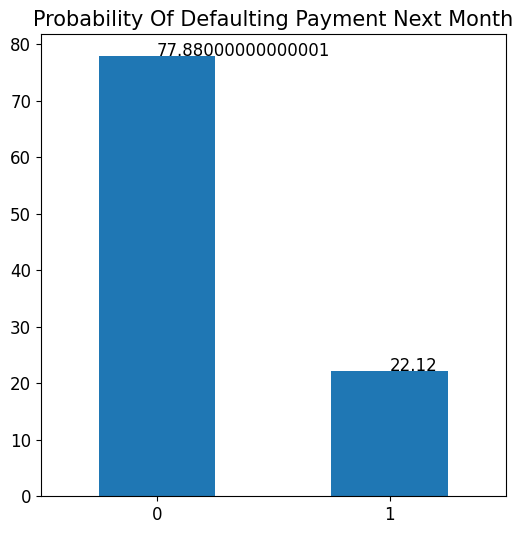

In [ ]:
def_cnt = (df1.default_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [ ]:
#We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

In [ ]:
def cat_plot(col):
    
    inter=df1.groupby(col)['default_pay'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df1,order=inter.index);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2);


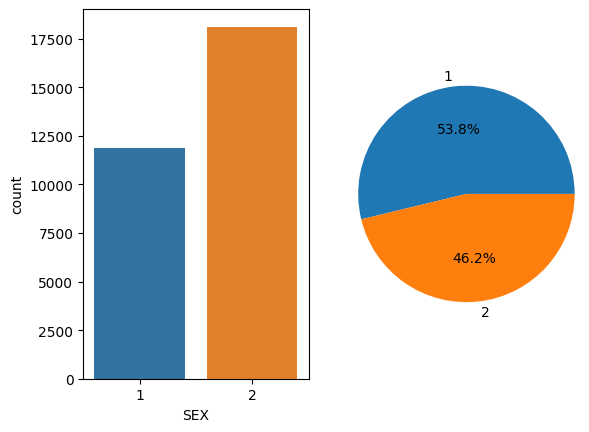

In [ ]:
 cat_plot('SEX')

In [ ]:
#Males have a higher chance on defaulting on credit card bills then female

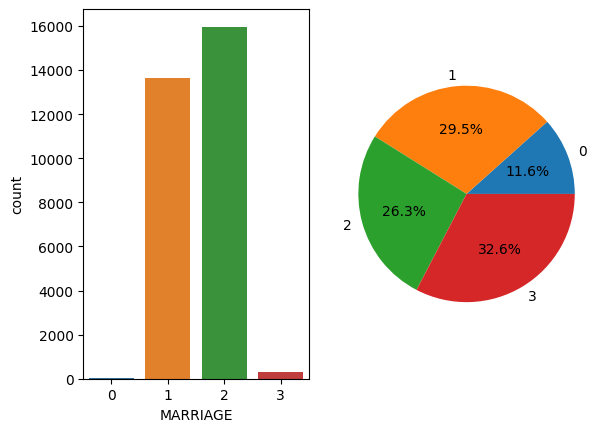

In [ ]:
cat_plot('MARRIAGE')

In [ ]:
#Single person have lower chances of defaulting.

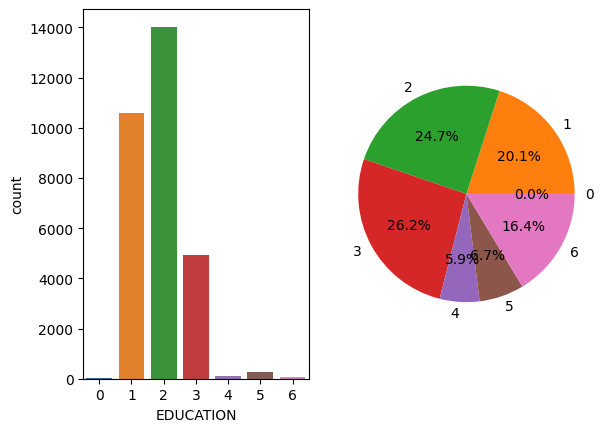

In [ ]:
cat_plot('EDUCATION')

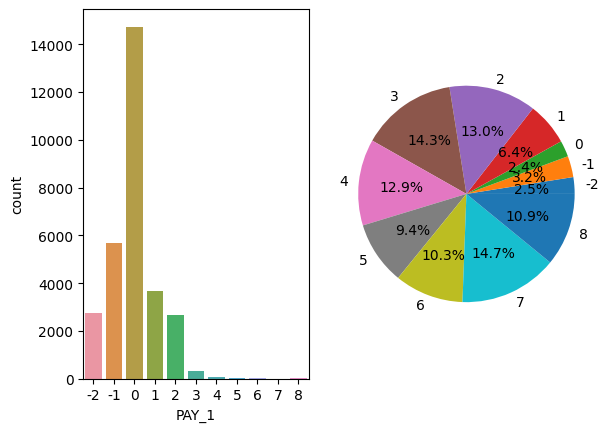

In [ ]:
cat_plot('PAY_1')

In [ ]:
#As the repayment status get delayed by 1 month, the chances of defaulting increases significantly.

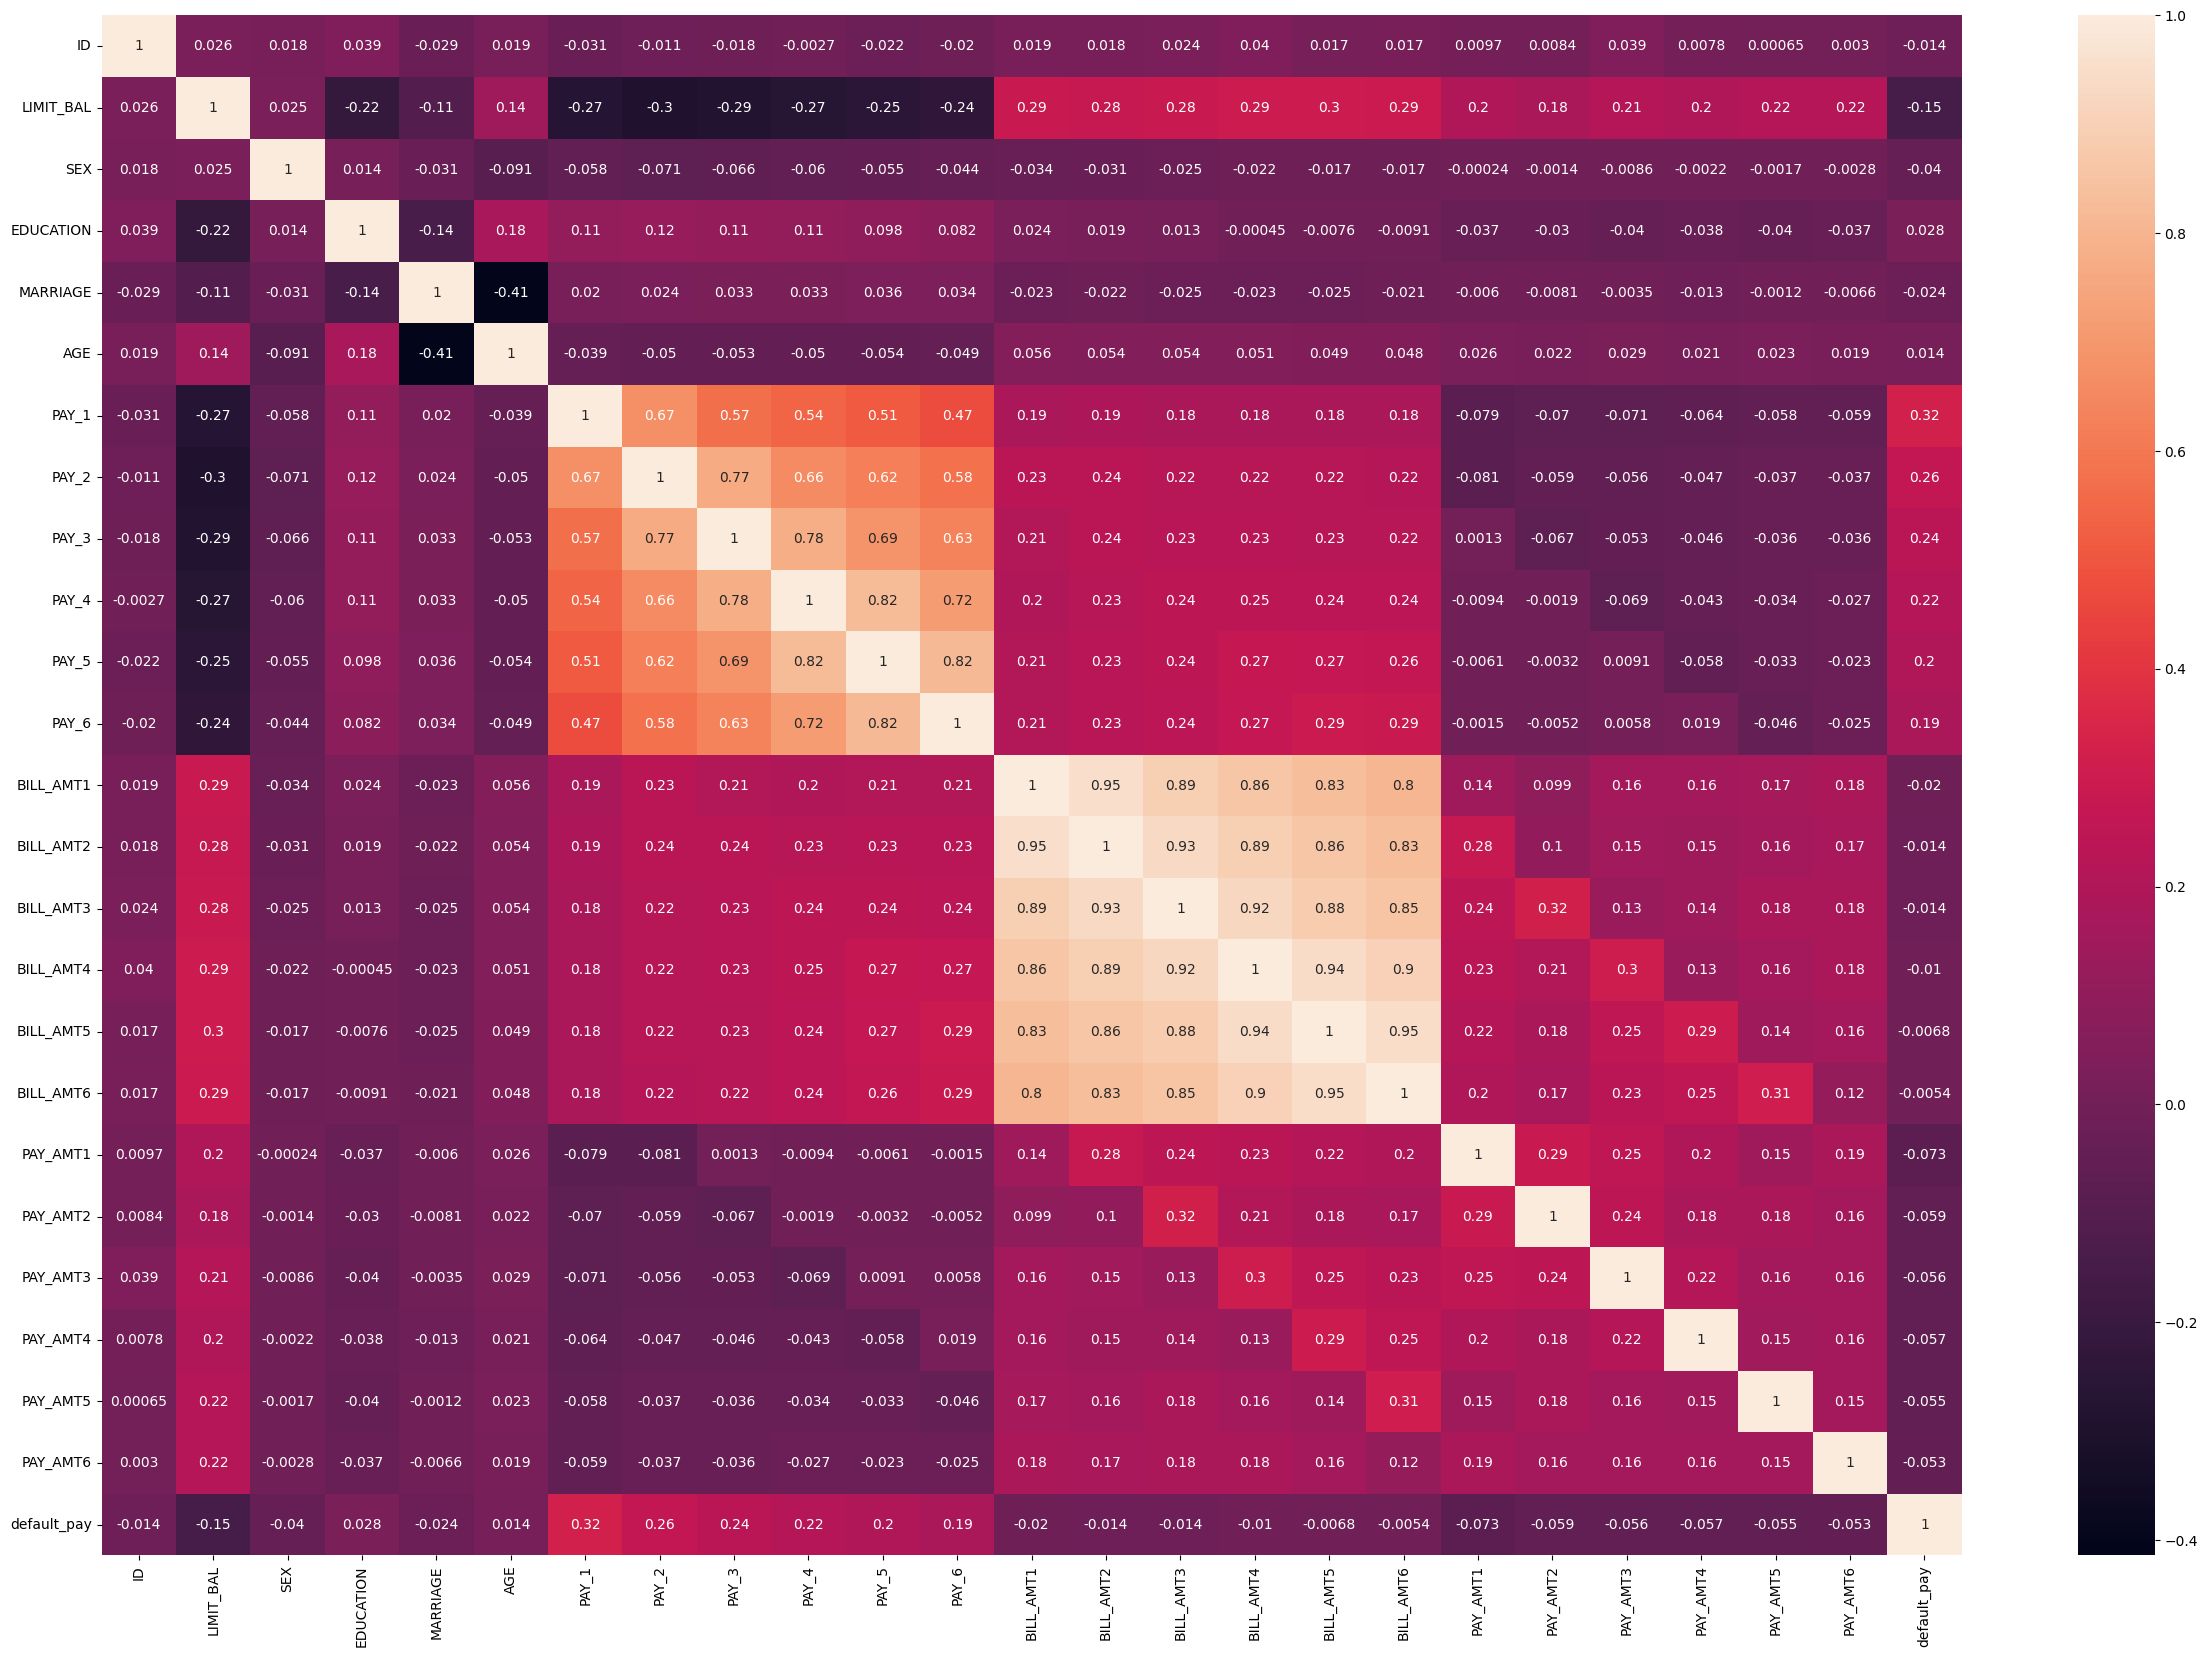

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

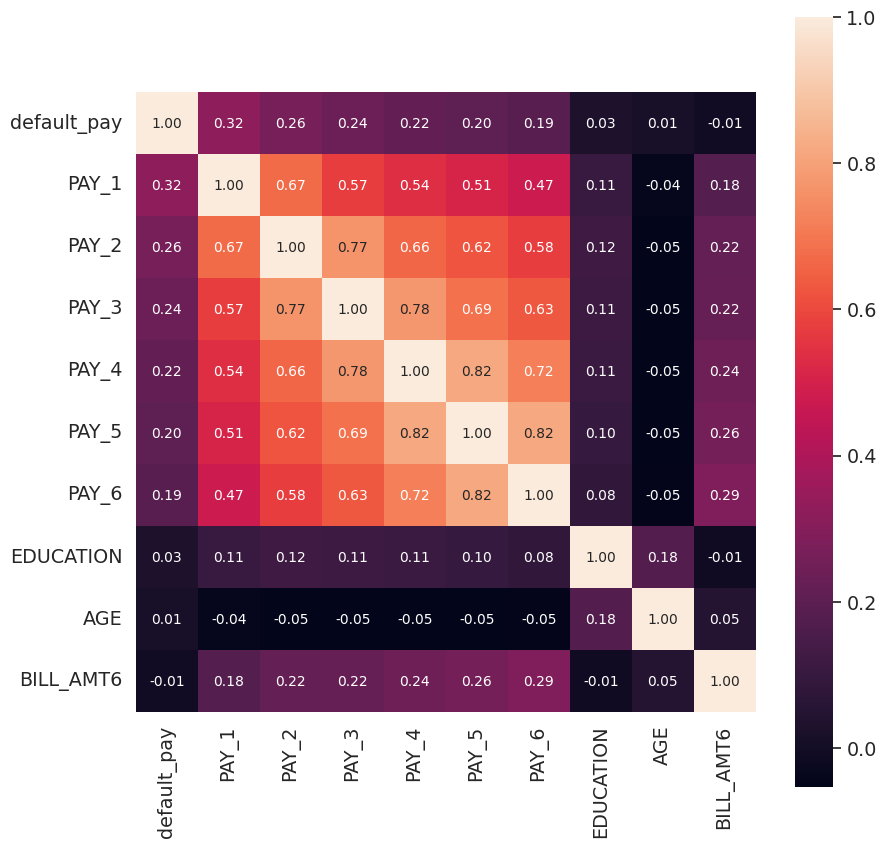

In [ ]:
#saleprice correlation matrix
k = 10 
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'default_pay')['default_pay'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

In [ ]:
#Building and training model

In [ ]:

# Separate target variable from independent variables
y = df1['default_pay']
X = df1.drop(columns=['ID', 'default_pay'])
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


In [ ]:
logging.info("Split data into train and test")

In [ ]:
# Create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [ ]:
# The data is imbalanced for defaulters and non defaulters
df_majority = df_train[df_train.default_pay == 0]
df_minority = df_train[df_train.default_pay == 1]

print("Majority class count", df_majority.default_pay.count())
print("Minority class count", df_minority.default_pay.count())

Majority class count 18677
Minority class count 5323


In [ ]:
# Using SMOTE to adjust the imbalance in data
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(y_SMOTE.value_counts())

0    18677
1    18677
Name: default_pay, dtype: int64


In [ ]:
logging.info("Performed SMOTE to overcome data imbalance")


In [ ]:
X_SMOTE

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000.0,2,2,2,24,0,0,0,0,0,...,78321.000000,73731.000000,39643.000000,39457.000000,3503.000000,5001.000000,2092.000000,1218.000000,1445.000000,878.000000
1,30000.0,1,2,2,28,0,0,0,0,0,...,29155.000000,25255.000000,22001.000000,0.000000,5006.000000,1244.000000,851.000000,955.000000,0.000000,0.000000
2,180000.0,2,5,1,44,0,0,-1,-1,-1,...,850.000000,0.000000,6881.000000,10340.000000,0.000000,850.000000,0.000000,6881.000000,10340.000000,182.000000
3,60000.0,1,1,2,25,0,0,0,0,0,...,38533.000000,39639.000000,39619.000000,39140.000000,2018.000000,1900.000000,2000.000000,1500.000000,1900.000000,2000.000000
4,130000.0,2,2,2,25,0,0,0,0,0,...,114734.000000,117823.000000,120854.000000,123904.000000,4100.000000,4200.000000,5000.000000,5000.000000,5000.000000,10700.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37349,200000.0,2,1,1,34,0,-1,0,0,0,...,12900.049019,158103.421608,145558.275075,159822.497355,16210.467840,12448.197280,155751.563314,11015.922481,43711.502288,10427.788960
37350,20000.0,1,1,1,24,-1,-1,-1,-1,-1,...,335.974955,335.974955,335.974955,449.033197,650.473383,335.974955,335.974955,335.974955,449.033197,252.879144
37351,310000.0,1,1,1,34,-1,-1,-2,-1,-1,...,201.489440,785.848525,937.446634,999.472062,470.191199,207.706906,792.065991,937.446634,345.749933,1444.714648
37352,30000.0,2,3,2,22,0,0,0,0,0,...,24516.932240,14893.350452,2758.474657,146.627658,1236.669370,1301.966165,1026.609346,55.236446,146.627658,0.000000


In [ ]:
scaler = StandardScaler()

In [ ]:
pipeline_lr=Pipeline([('scalar1',scaler),
                     ('lr_classifier',LogisticRegression(random_state= 123))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',scaler),
                     ('dt_classifier',DecisionTreeClassifier(max_depth = 3, max_features=4, criterion='gini', random_state= 123))])

In [ ]:
pipeline_svc=Pipeline([('scalar3',scaler),
                     ('svc_classifier',SVC(random_state= 123))])

In [ ]:
pipeline_adb=Pipeline([('scalar4',scaler),
                     ('adb_classifier',AdaBoostClassifier(random_state= 123))])

In [ ]:
pipeline_knn=Pipeline([('scalar5',scaler),
                     ('knn_classifier',KNeighborsClassifier(n_neighbors=5))])

In [ ]:
pipeline_nb=Pipeline([('scalar6',scaler),
                     ('nb_classifier',GaussianNB())])

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_svc, pipeline_adb, pipeline_knn, pipeline_nb]

In [ ]:
logging.info("Created pipelines for all models")

In [ ]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Suport Vector Classifier', 3: 'AdaBoost', 4:'K Nearest Neighbors', 5:'Naive Bayes'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_SMOTE, y_SMOTE)

In [ ]:
logging.info("Fitted the models on the training data")

In [ ]:
# Making predictions with all models

lr_pred = pipeline_lr.predict(X_test)
dt_pred = pipeline_dt.predict(X_test)
svc_pred = pipeline_svc.predict(X_test)
adb_pred = pipeline_adb.predict(X_test)
knn_pred = pipeline_knn.predict(X_test)
nb_pred = pipeline_nb.predict(X_test)

In [ ]:
logging.info("Fitted the models on the training data")
preds = [lr_pred, dt_pred, svc_pred, adb_pred, knn_pred, nb_pred]

In [ ]:
# Making predictions with all models

lr_pred = pipeline_lr.predict(X_test)
dt_pred = pipeline_dt.predict(X_test)
svc_pred = pipeline_svc.predict(X_test)
adb_pred = pipeline_adb.predict(X_test)
knn_pred = pipeline_knn.predict(X_test)
nb_pred = pipeline_nb.predict(X_test)

In [ ]:
logging.info("Made predictions on test data with all models")

In [ ]:
preds = [lr_pred, dt_pred, svc_pred, adb_pred, knn_pred, nb_pred]

In [ ]:
i=1
for i, pred in enumerate(preds):

    print('\033[1m' + 'Model:{}'.format(pipe_dict[i])  + '\033[0m')
    print('\033[1m'+ 'Accuracy'+ '\033[0m', round(accuracy_score(pred,y_test)*100,2))
    print('---------------------------------------------------')
    print('\033[1m'+ 'Confusion Matrix'+'\033[0m')
    print(confusion_matrix(pred,y_test))
    print('---------------------------------------------------')
    print('\033[1m'+'Classification Report'+'\033[0m')
    print(classification_report(pred,y_test))
    print('***************************************************')
    print("\n")

Model:Logistic Regression
Accuracy 68.73
---------------------------------------------------
Confusion Matrix
[[3362  551]
 [1325  762]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      3913
           1       0.58      0.37      0.45      2087

    accuracy                           0.69      6000
   macro avg       0.65      0.61      0.62      6000
weighted avg       0.67      0.69      0.67      6000

***************************************************


Model:Decision Tree
Accuracy 68.9
---------------------------------------------------
Confusion Matrix
[[3509  688]
 [1178  625]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4197
           1       0.48      0.35      0.40      1803

    accuracy                           0

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
# Accuracy of Logistic regression model
log_model_acc = accuracy_score(lr_pred,y_test)*100

# Accuracy of Decision tree model
dt_model_acc = accuracy_score(dt_pred,y_test)*100

# Accuracy of SVM model
svc_model_acc = accuracy_score(svc_pred,y_test)*100

# Accuracy of AdaBoost model
adb_model_acc = accuracy_score(adb_pred,y_test)*100

# Accuracy of KNN model
knn_model_acc = accuracy_score(knn_pred,y_test)*100

# Accuracy of Naive Bayes model
nb_model_acc = accuracy_score(nb_pred,y_test)*100

In [ ]:
# Creating a dataframe of the models and its accuracy for plotting
model_data = {'Model':['Logistic regression', 'Decision tree', 'SVM', 'ADB', 'KNN', 'NB'],
        'Accuracy':[log_model_acc, dt_model_acc, svc_model_acc, adb_model_acc, knn_model_acc, nb_model_acc]}
 
# Create DataFrame
model_df = pd.DataFrame(model_data)
model_df

,Model,Accuracy
0,Logistic regression,68.733333
1,Decision tree,68.900000
2,SVM,74.316667
3,ADB,72.566667
4,KNN,69.783333
5,NB,39.266667


In [ ]:
# sorting the accuracy in ascending order
model_df_sorted= model_df.sort_values('Accuracy')


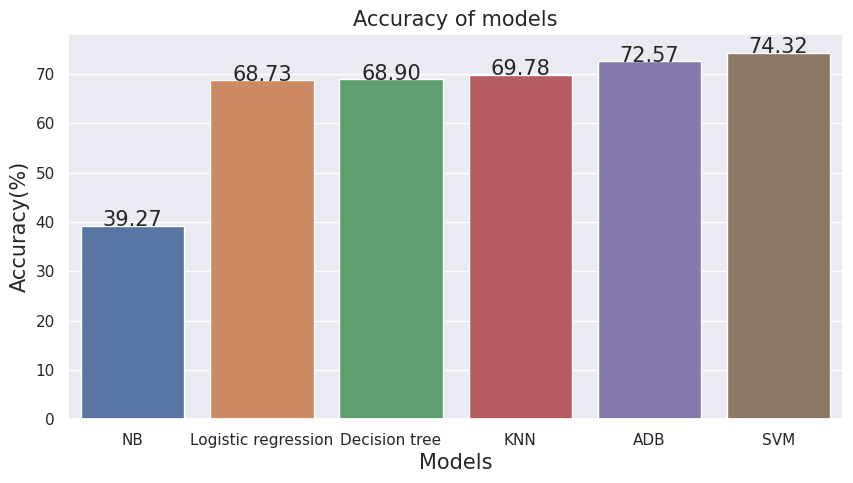

In [ ]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()

In [ ]:
logging.info("Ran all models and found model with best accuracy")

In [ ]:
#Saving the best model
import pickle

In [ ]:
pickle.dump(pipeline_svc['svc_classifier'], open('svc_model.pkl', 'wb'))